# 課題. MNISTをk-NNで学習せよ
注意
homework関数を完成させて提出してください

訓練データはtrain_X, train_y, テストデータはtest_Xで与えられます

train_Xとtrain_yをtrain_X, train_yとvalid_X, valid_yに分けるなどしてモデルを学習させてください
test_Xに対して予想ラベルpred_yを作り, homework関数の戻り値としてください
pred_yのtest_yに対する精度(F値)で評価します
全体の実行時間がiLect上で60分を超えないようにしてください
homework関数の外には何も書かないでください
k-NNの実装にscikit-learnなどのライブラリを使わないでください
次のコードが事前に実行されます

In [2]:
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split

import numpy as np


mnist = fetch_mldata('MNIST original')
mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                           mnist.target.astype('int32'), random_state=42)

mnist_X = mnist_X / 255.0

train_X, test_X, train_y, test_y = train_test_split(mnist_X, mnist_y,
                                                    test_size=0.2,
                                                    random_state=None)

次のセルのhomework関数を完成させて提出してください
上記のコード以外で必要なものは全て書いてください

In [25]:
a = np.array([[1,2,4],[4,5,6]])
print(np.sqrt(np.sum(a**2,axis=1)))
b=np.array([1,2])
print((a.T/b).T)
print(a.T.shape,b.shape)
f = np.array([[3,2,3]])
e = np.append(np.array(a),f,axis = 0)
print(e[:,0])
e = [e[i] for i in range(0,len(e))]
print(np.array(e))
e = sorted(e,key=lambda x:x[0])
print(np.array(e))
e[0][0:2]

[ 4.58257569  8.77496439]
[[ 1.   2.   4. ]
 [ 2.   2.5  3. ]]
(3, 2) (2,)
[1 4 3]
[[1 2 4]
 [4 5 6]
 [3 2 3]]
[[1 2 4]
 [3 2 3]
 [4 5 6]]


array([1, 2])

In [16]:
def mode(arr):
    r = [0] * (int(max(arr[1])) + 1)
    for a in map(int,arr[1]):
        r[a] += 1
    if r.count(max(r))==1:
        return r.index(max(r))
    else:
        return arr[0]
c =np.array([1.,2.,4.,5.],dtype = np.float64).astype(int)
#d =[ c[i] for i in range(0,len(c))].astype(np.float64)

#d.append(mode(c))
print(len(c))

4


In [20]:
def homework(train_X,train_y,test_X):
    #最頻値関数の定義
    def mode(arr):
        r = [0]*10
        for a in range(0,len(arr)):
            r[int(np.asscalar(arr[a]))] += 1
        if r.count(max(r))==1:
            return r.index(max(r))
        else:
            return arr[0].astype(int)
    # cross validation をする。　n-fold caross validation　n = 5
    for  j in range(0,1):
        new_train_X = np.array([train_X[i] for i in range(0,len(train_X)) if i%5 != j])
        val_X = np.array([train_X[i] for i in range(0,len(train_X)) if i%5 == j])
        new_train_y = np.array([train_y[i] for i in range(0,len(train_y) ) if i%5 != j ])
        val_y = np.array([train_y[i] for i in range(0,len(train_y)) if i%5 == j])
        #パラメーターkのトレーニング
        for k in range(11,12):
            predicted_list = []
            #result = cos(train_X,val_X)
            norm1 = np.sqrt(np.sum(new_train_X**2,axis = 1))
            norm2 = np.sqrt(np.sum(val_X**2,axis = 1))
            result = ((np.dot(val_X,new_train_X.T)/norm1).T/norm2).T
            for i in range(0,5):
                tmp = np.append(np.array([result[i]]),np.array([new_train_y.T]),axis = 0).T
                tmp = [tmp[i] for i in range(0,len(tmp))]##sort のために　list化
                tmp = np.array(sorted(tmp,key=lambda x:x[0],reverse = True)).T
                predicted_list.append(mode(tmp[1,0:k]))
                print(tmp.T[0:6])
    print(val_y[0:5],predicted_list,tmp.shape)
    return fi_score(val_y,predicted_list)
        
homework(train_X,train_y,test_X)

[[ 0.9110775   3.        ]
 [ 0.90592611  3.        ]
 [ 0.90315121  3.        ]
 [ 0.88856852  3.        ]
 [ 0.87627614  3.        ]
 [ 0.87540203  3.        ]]
[[ 0.85760391  2.        ]
 [ 0.85341579  2.        ]
 [ 0.82683951  2.        ]
 [ 0.82155979  2.        ]
 [ 0.81552023  2.        ]
 [ 0.80747575  2.        ]]
[[ 0.88781905  3.        ]
 [ 0.87655675  3.        ]
 [ 0.87463689  3.        ]
 [ 0.86989015  3.        ]
 [ 0.86876708  3.        ]
 [ 0.86644202  3.        ]]
[[ 0.93091905  7.        ]
 [ 0.91680372  7.        ]
 [ 0.90492934  7.        ]
 [ 0.90451443  7.        ]
 [ 0.90029764  7.        ]
 [ 0.89751941  7.        ]]
[[ 0.89994973  4.        ]
 [ 0.8935734   4.        ]
 [ 0.87283891  4.        ]
 [ 0.86992592  4.        ]
 [ 0.86397767  4.        ]
 [ 0.86275899  4.        ]]
[3 2 3 7 4] [3, 2, 3, 7, 4] (2, 44800)


In [65]:
aa=[[1,2],[3,5],[2,3]]
print(aa[0:len(aa)])

[[1, 2], [3, 5], [2, 3]]


In [11]:
1 == 1.0

True

In [18]:
def homework(train_X,train_y,test_X):
    #f_scoreを格納するリスト
    f = []
    #最頻値関数の定義
    def mode(arr):
        r = [0]*10
        for a in range(0,len(arr)):
            r[int(np.asscalar(arr[a]))] += 1
        if r.count(max(r))==1:
            return r.index(max(r))
        else:
            return arr[0].astype(int)
    # cross validation をする。　n-fold caross validation　n = 5
    for  j in range(0,5):
        new_train_X = np.array([train_X[i] for i in range(0,len(train_X)) if i%5 != j])
        val_X = np.array([train_X[i] for i in range(0,len(train_X)) if i%5 == j])
        new_train_y = np.array([train_y[i] for i in range(0,len(train_y) ) if i%5 != j ])
        val_y = np.array([train_y[i] for i in range(0,len(train_y)) if i%5 == j])
        #パラメーターkのトレーニング
        for k in range(11,12):
            predicted_list = []
            #result = cos(train_X,val_X)
            norm1 = np.sqrt(np.sum(new_train_X**2,axis = 1))
            norm2 = np.sqrt(np.sum(val_X**2,axis = 1))
            result = ((np.dot(val_X,new_train_X.T)/norm1).T/norm2).T
            for i in range(0,len(result)):
                tmp = np.append(np.array([result[i]]),np.array([new_train_y.T]),axis = 0).T
                tmp = [tmp[i] for i in range(0,len(tmp))]##sort のために　list化
                tmp = np.array(sorted(tmp,key=lambda x:x[0],reverse = True)).T
                predicted_list.append(mode(tmp[1,0:k]))
                print(tmp.T[0:6])
                f.append(fi_score(val_y,predicted_list))
    print(val_y[0:5],predicted_list,tmp.shape)
    return 
        
homework(train_X,train_y,test_X)

[[ 0.9110775   3.        ]
 [ 0.90592611  3.        ]
 [ 0.90315121  3.        ]
 [ 0.88856852  3.        ]
 [ 0.87627614  3.        ]
 [ 0.87540203  3.        ]]
[[ 0.85760391  2.        ]
 [ 0.85341579  2.        ]
 [ 0.82683951  2.        ]
 [ 0.82155979  2.        ]
 [ 0.81552023  2.        ]
 [ 0.80747575  2.        ]]
[[ 0.88781905  3.        ]
 [ 0.87655675  3.        ]
 [ 0.87463689  3.        ]
 [ 0.86989015  3.        ]
 [ 0.86876708  3.        ]
 [ 0.86644202  3.        ]]
[[ 0.93091905  7.        ]
 [ 0.91680372  7.        ]
 [ 0.90492934  7.        ]
 [ 0.90451443  7.        ]
 [ 0.90029764  7.        ]
 [ 0.89751941  7.        ]]
[[ 0.89994973  4.        ]
 [ 0.8935734   4.        ]
 [ 0.87283891  4.        ]
 [ 0.86992592  4.        ]
 [ 0.86397767  4.        ]
 [ 0.86275899  4.        ]]
[3 2 3 7 4] [] (2, 44800)


In [27]:
def homework(train_X,train_y,test_X):
    #最頻値関数の定義
    def mode(arr):
        r = [0]*10
        for a in range(0,len(arr)):
            r[int(np.asscalar(arr[a]))] += 1
        if r.count(max(r))==1:
            return r.index(max(r))
        else:
            return arr[0].astype(int)
    # cross validation をする。　n-fold caross validation　n = 5
    for  j in range(0,1):
        new_train_X = np.array([train_X[i] for i in range(0,len(train_X)) if i%5 != j])
        val_X = np.array([train_X[i] for i in range(0,len(train_X)) if i%5 == j])
        new_train_y = np.array([train_y[i] for i in range(0,len(train_y) ) if i%5 != j ])
        val_y = np.array([train_y[i] for i in range(0,len(train_y)) if i%5 == j])
        #パラメーターkのトレーニング
        for k in range(11,12):
            predicted_list = []
            #result = cos(train_X,val_X)
            norm1 = np.sqrt(np.sum(new_train_X**2,axis = 1))
            norm2 = np.sqrt(np.sum(val_X**2,axis = 1))
            result = ((np.dot(val_X,new_train_X.T)/norm1).T/norm2).T
            for i in range(0,5):
                tmp = np.append(np.array([result[i]]),np.array([new_train_y.T]),axis = 0).T
                tmp = [tmp[i] for i in range(0,len(tmp))]##sort のために　list化
                tmp = np.array(sorted(tmp,key=lambda x:x[0],reverse = True)).T
                predicted_list.append(mode(tmp[1,0:k]))
                print(tmp.T[0:6])
    print(val_y[0:5],predicted_list,tmp.shape)
    return f1_score(val_y[0:5],np.array(predicted_list))
        
homework(train_X,train_y,test_X)

[[ 0.9110775   3.        ]
 [ 0.90592611  3.        ]
 [ 0.90315121  3.        ]
 [ 0.88856852  3.        ]
 [ 0.87627614  3.        ]
 [ 0.87540203  3.        ]]
[[ 0.85760391  2.        ]
 [ 0.85341579  2.        ]
 [ 0.82683951  2.        ]
 [ 0.82155979  2.        ]
 [ 0.81552023  2.        ]
 [ 0.80747575  2.        ]]
[[ 0.88781905  3.        ]
 [ 0.87655675  3.        ]
 [ 0.87463689  3.        ]
 [ 0.86989015  3.        ]
 [ 0.86876708  3.        ]
 [ 0.86644202  3.        ]]
[[ 0.93091905  7.        ]
 [ 0.91680372  7.        ]
 [ 0.90492934  7.        ]
 [ 0.90451443  7.        ]
 [ 0.90029764  7.        ]
 [ 0.89751941  7.        ]]
[[ 0.89994973  4.        ]
 [ 0.8935734   4.        ]
 [ 0.87283891  4.        ]
 [ 0.86992592  4.        ]
 [ 0.86397767  4.        ]
 [ 0.86275899  4.        ]]
[3 2 3 7 4] [3, 2, 3, 7, 4] (2, 44800)


/Users/iwamotoshinichi/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


1.0

In [26]:
f1_score(np.array([1,2,3]),np.array([1,23,3]))

/Users/iwamotoshinichi/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/iwamotoshinichi/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/iwamotoshinichi/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', ave

0.66666666666666663

In [1]:
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split

import numpy as np


mnist = fetch_mldata('MNIST original')
mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                           mnist.target.astype('int32'), random_state=42)

mnist_X = mnist_X / 255.0

train_X, test_X, train_y, test_y = train_test_split(mnist_X, mnist_y,
                                                    test_size=0.2,
                                                    random_state=None)


def homework(train_X,train_y,test_X):
    pred_y =[]
    #メモリー削減のため手動でガベージコレクション
    import gc
    #最頻値関数の定義
    def mode(arr):
        r = [0]*10
        for a in range(0,len(arr)):
            r[int(np.asscalar(arr[a]))] += 1
        if r.count(max(r))== 1:
            return r.index(max(r))
        else:
            return arr[0].astype(int)
    
    # 予想操作を定義する
    def basic_operation(new_train_X,val_X,new_train_y,k):
        predicted_list = []
        #result = cos(train_X,val_X)
        norm1 = np.sqrt(np.sum(new_train_X**2,axis = 1))
        norm2 = np.sqrt(np.sum(val_X**2,axis = 1))
        result = ((np.dot(val_X,new_train_X.T)/norm1).T/norm2).T
        #i番目のvalidation_exampleをtmpに格納してsort
        for i in range(0,len(result)):
            tmp = np.append(np.array([result[i]]),np.array([new_train_y.T]),axis = 0).T
            tmp = [tmp[i] for i in range(0,len(tmp))]      #sort のために　list化
            tmp = np.array(sorted(tmp,key=lambda x:x[0],reverse = True)).T   
            predicted_list.append(mode(tmp[1,0:k]))
        return predicted_list
    #f値,kを初期化
    f = 0 #f値
    k = 9 #k-nnのk
    #f > 0.92まで　k をトレーニング(k1 = 9)
    while f < 0.92:
        f = 0
        k += 2
        # cross validation をする。　n-fold caross validation　n = 5 
        for  j in range(0,5):
            new_train_X = np.array([train_X[i] for i in range(0,len(train_X)) if i%5 == (j+1)%5 ])
            val_X = np.array([train_X[i] for i in range(0,len(train_X)) if i%10 == j])
            new_train_y = np.array([train_y[i] for i in range(0,len(train_y) ) if i%5 == (j+1)%5])
            val_y = np.array([train_y[i] for i in range(0,len(train_y)) if i%10 == j])
            #print('Here!')
            predicted_list = basic_operation(new_train_X,val_X,new_train_y,k)
            f += f1_score(val_y,np.array(predicted_list))
        f =f/5.0
        print(f)
    #不要になった val_y, predicted_list 等を消去
    del val_y,predicted_list,train_X,train_y,val_X
    gc.collect()
    for i in range(0,50):
        n = len(test_X)
        new_test_X = test_X[int(n*i/50):int((i+1)*n/50)]
        #print('Here!')
        pred_y[int(n*i/50):int((i+1)*n/50)] = basic_operation(train_X,new_test_X,train_y,k)
        #print('Here!!')
    return pred_y

y = np.array(homework(train_X,train_y,test_X))
print(y)
print(f1_score(y,test_y),y,np.sum((y == test_y)/len(test_y)))

Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
Here!!
[0 3 9 ..., 9 8 3]
0.974082549127 [0 3 9 ..., 9 8 3] 0.974071428571


/Users/iwamotoshinichi/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


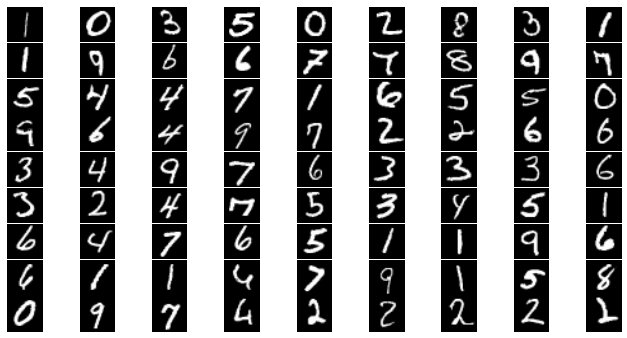

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(train_X[i].reshape((28, 28)), cmap='gray')